# Análisis Exploratorio - EMA (2018 - 2024) con variable 'temp_2m'

## 1. Concatenación de las variables en un dataset maestro

In [1]:
import pandas as pd
import os

In [2]:
# Rutas de los archivos
path_base = "../data/processed/df_clean.csv"
path_temp2m = "../data/raw/temp2m_hourly_2018_2025.csv"

In [3]:
# 1. Cargar el dataset base (df_clean)
# Según indicas, este archivo tiene formato complejo (espacios)
try:
    # Primero inspeccionamos el formato real
    with open(path_base, 'r', encoding='utf-8') as f:
        primera_linea_base = f.readline().strip()
        segunda_linea_base = f.readline().strip()
    
    print(f"Formato de df_clean.csv:")
    print(f"Primera línea: {primera_linea_base}")
    print(f"Segunda línea: {segunda_linea_base[:100]}...")
    
    # Detectamos el separador correcto
    if ',' in primera_linea_base:
        print("Usando separador de comas (,)")
        df_base = pd.read_csv(path_base, sep=',', index_col=0)
    else:
        print("Usando separador de espacios (\\s+)")
        df_base = pd.read_csv(path_base, sep='\s+', index_col=0)
    
    # Convertimos el índice a datetime
    df_base.index = pd.to_datetime(df_base.index)
    df_base.index.name = 'time'
    
    print(f"Base cargada (df_clean): {df_base.shape}")
    print(f"Columnas: {list(df_base.columns)}")
    print(f"Primeras 3 filas:\n{df_base.head(3)}")
    
except Exception as e:
    print(f" Error cargando df_clean: {e}")
    df_base = pd.DataFrame()

Formato de df_clean.csv:
Primera línea: time,HR,pp,press,radinf,tempsup,vel,dir,dir_sin,dir_cos
Segunda línea: 2018-01-01 00:00:00,89.515,1.778,687.403,346.36,9.251,2.979,145.642,0.5643620119035799,-0.8255274189...
Usando separador de comas (,)
Base cargada (df_clean): (67200, 9)
Columnas: ['HR', 'pp', 'press', 'radinf', 'tempsup', 'vel', 'dir', 'dir_sin', 'dir_cos']
Primeras 3 filas:
                         HR     pp    press   radinf  tempsup    vel      dir  \
time                                                                            
2018-01-01 00:00:00  89.515  1.778  687.403  346.360    9.251  2.979  145.642   
2018-01-01 01:00:00  90.295  0.254  686.942  347.505    9.311  1.700  284.018   
2018-01-01 02:00:00  91.005  0.254  686.677  348.290    9.422  1.657   63.065   

                      dir_sin   dir_cos  
time                                     
2018-01-01 00:00:00  0.564362 -0.825527  
2018-01-01 01:00:00 -0.970220  0.242227  
2018-01-01 02:00:00  0.891521  0.45297

In [4]:
# 2. Cargar y procesar temp2m_hourly_2018_2025.csv
# Este archivo puede tener comillas y formato inconsistente
try:
    with open(path_temp2m, 'r', encoding='utf-8-sig') as f:
        primera_linea = f.readline().strip()
        segunda_linea = f.readline().strip()
    
    print(f"\nFormato de temp2m:")
    print(f"Primera línea: {primera_linea}")
    print(f"Segunda línea: {segunda_linea}")
    
    # Detectamos formato con comillas
    if primera_linea.startswith('"') and primera_linea.endswith('"'):
        df_temp = pd.read_csv(path_temp2m, sep=',', encoding='utf-8-sig', quotechar='"')
    else:
        df_temp = pd.read_csv(path_temp2m, sep=',', encoding='utf-8-sig')
    
    df_temp.columns = df_temp.columns.str.strip().str.lower()
    
    # Procesamiento manual si es necesario
    if len(df_temp.columns) == 1 and ',' in df_temp.columns[0]:
        print(" Procesando manualmente...")
        rows = []
        with open(path_temp2m, 'r', encoding='utf-8-sig') as f:
            header = f.readline().strip().strip('"').split(',')
            for line in f:
                values = line.strip().strip('"').split(',')
                rows.append(values)
        
        df_temp = pd.DataFrame(rows, columns=header)
        df_temp.columns = df_temp.columns.str.strip().str.lower()
    
    # CORRECCIÓN IMPORTANTE: Convertir TODAS las columnas a numérico excepto 'time'
    for col in df_temp.columns:
        if col != 'time':
            df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')
    
    # Convertir fecha e indexar
    df_temp['time'] = pd.to_datetime(df_temp['time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    df_temp = df_temp.dropna(subset=['time'])
    df_temp.set_index('time', inplace=True)
    
    # Extraer 'mean' y renombrar
    if 'mean' in df_temp.columns:
        df_temp2m = df_temp[['mean']].rename(columns={'mean': 'temp2m'})
        print(f" temp2m procesada: {df_temp2m.shape}")
        print(f"Primeros 5 valores:\n{df_temp2m.head()}")
        print(f"Últimos 5 valores:\n{df_temp2m.tail()}")
    else:
        raise ValueError(f"Columna 'mean' no encontrada")

except Exception as e:
    print(f" Error procesando temp2m: {e}")
    import traceback
    traceback.print_exc()
    df_temp2m = pd.DataFrame()


Formato de temp2m:
Primera línea: "time,mean,std,max,min"
Segunda línea: "2018-01-01 00:00:00,7.661,0.085,7.846,7.532"
 Procesando manualmente...
 temp2m procesada: (68664, 1)
Primeros 5 valores:
                     temp2m
time                       
2018-01-01 00:00:00   7.661
2018-01-01 01:00:00   7.736
2018-01-01 02:00:00   7.571
2018-01-01 03:00:00   7.520
2018-01-01 04:00:00   7.133
Últimos 5 valores:
                     temp2m
time                       
2025-10-31 19:00:00  12.813
2025-10-31 20:00:00  10.581
2025-10-31 21:00:00   9.185
2025-10-31 22:00:00   8.037
2025-10-31 23:00:00   7.565


In [5]:
# 3. Unir df_base con df_temp2m
if not df_base.empty and not df_temp2m.empty:
    print(f"df_base: {df_base.shape}, índice: {df_base.index.min()} a {df_base.index.max()}")
    print(f"df_temp2m: {df_temp2m.shape}, índice: {df_temp2m.index.min()} a {df_temp2m.index.max()}")
    
    # Unión por índice temporal
    df_master_v2 = df_base.join(df_temp2m, how='inner')
    
    print(f"\n--- Dataset Maestro Final ---")
    print(f"Dimensiones: {df_master_v2.shape}")
    print(f"Columnas: {df_master_v2.columns.tolist()}")
    print(f"\nPrimeras 5 filas:")
    print(df_master_v2.head())
    print(f"\nÚltimas 5 filas:")
    print(df_master_v2.tail())
    
    # Verificación de temp2m
    print(f"\nEstadísticas de temp2m:")
    print(df_master_v2['temp2m'].describe())
    
else:
    print("\n No se pudo crear el dataset maestro.")

df_base: (67200, 9), índice: 2018-01-01 00:00:00 a 2025-08-31 23:00:00
df_temp2m: (68664, 1), índice: 2018-01-01 00:00:00 a 2025-10-31 23:00:00

--- Dataset Maestro Final ---
Dimensiones: (67200, 10)
Columnas: ['HR', 'pp', 'press', 'radinf', 'tempsup', 'vel', 'dir', 'dir_sin', 'dir_cos', 'temp2m']

Primeras 5 filas:
                         HR     pp    press   radinf  tempsup    vel      dir  \
time                                                                            
2018-01-01 00:00:00  89.515  1.778  687.403  346.360    9.251  2.979  145.642   
2018-01-01 01:00:00  90.295  0.254  686.942  347.505    9.311  1.700  284.018   
2018-01-01 02:00:00  91.005  0.254  686.677  348.290    9.422  1.657   63.065   
2018-01-01 03:00:00  89.732  0.000  686.500  346.442    9.388  1.132   34.775   
2018-01-01 04:00:00  88.882  0.508  686.603  342.472    9.146  0.648   72.418   

                      dir_sin   dir_cos  temp2m  
time                                             
2018-01-01 00:

## 2. Calidad y Limpieza de Datos

In [6]:
# 1. Conteo de nulos por variable
print("--- Valores Nulos por Variable ---")
nulos = df_master_v2.isnull().sum()
print(nulos)

print("\n--- Porcentaje de Nulos ---")
print((nulos / len(df_master_v2)) * 100)

--- Valores Nulos por Variable ---
HR           0
pp           0
press        0
radinf       0
tempsup      0
vel          0
dir          0
dir_sin      0
dir_cos      0
temp2m     548
dtype: int64

--- Porcentaje de Nulos ---
HR         0.000000
pp         0.000000
press      0.000000
radinf     0.000000
tempsup    0.000000
vel        0.000000
dir        0.000000
dir_sin    0.000000
dir_cos    0.000000
temp2m     0.815476
dtype: float64


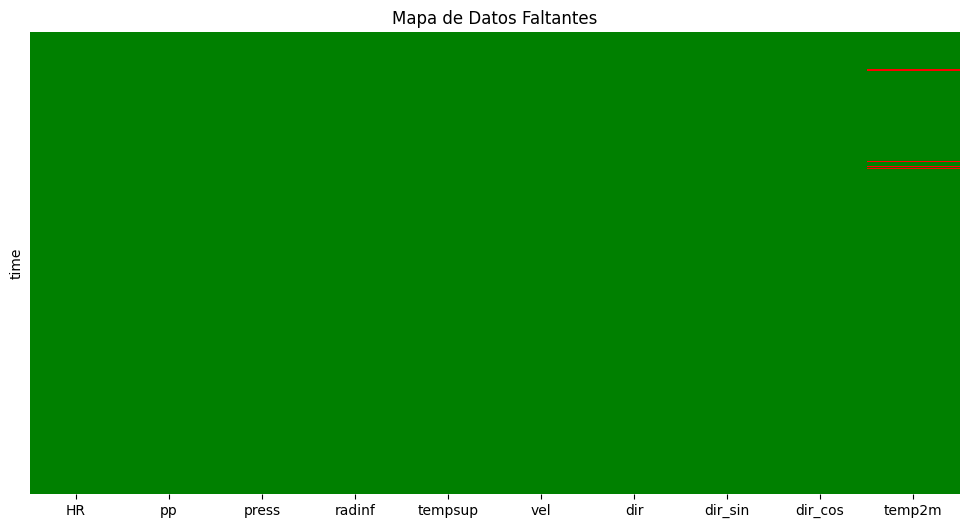

In [7]:
# 2. Visualización de los huecos (Mapa de Valores Nulos)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Isnull devuelve True (1) si falta dato, False (0) si está bien.
# El mapa mostrará rayas blancas donde falten datos.
sns.heatmap(df_master_v2.isnull(), cbar=False, cmap=['green', 'yellow', 'red'] , yticklabels=False)
plt.title("Mapa de Datos Faltantes")
plt.show()

In [8]:
# 2. Creación de df_clean_v2 e Imputación
# Usamos interpolación por tiempo.
# Al ser variables físicas continuas (temp, presión), si a la 1:00 vale 10 y a las 3:00 vale 20,
# asumiremos que a las 2:00 valía 15.
df_clean_v2 = df_master_v2.interpolate(method='time', limit_direction='both')
# 3. Verificación Final
print("\n--- Nulos restantes en df_clean_v2 ---")
print(df_clean_v2.isnull().sum())


--- Nulos restantes en df_clean_v2 ---
HR         0
pp         0
press      0
radinf     0
tempsup    0
vel        0
dir        0
dir_sin    0
dir_cos    0
temp2m     0
dtype: int64


In [9]:
# Guardar el nuevo DataFrame limpio
output_path = "../data/processed/"
df_clean_v2.to_csv(output_path + "df_clean_v2.csv", index=True)

## 3. Análisis de Distribuciones Nuevo Dataset

In [10]:
# 1. Carga del DataFrame limpio v2
df_clean_v2 = pd.read_csv("../data/processed/df_clean_v2.csv")

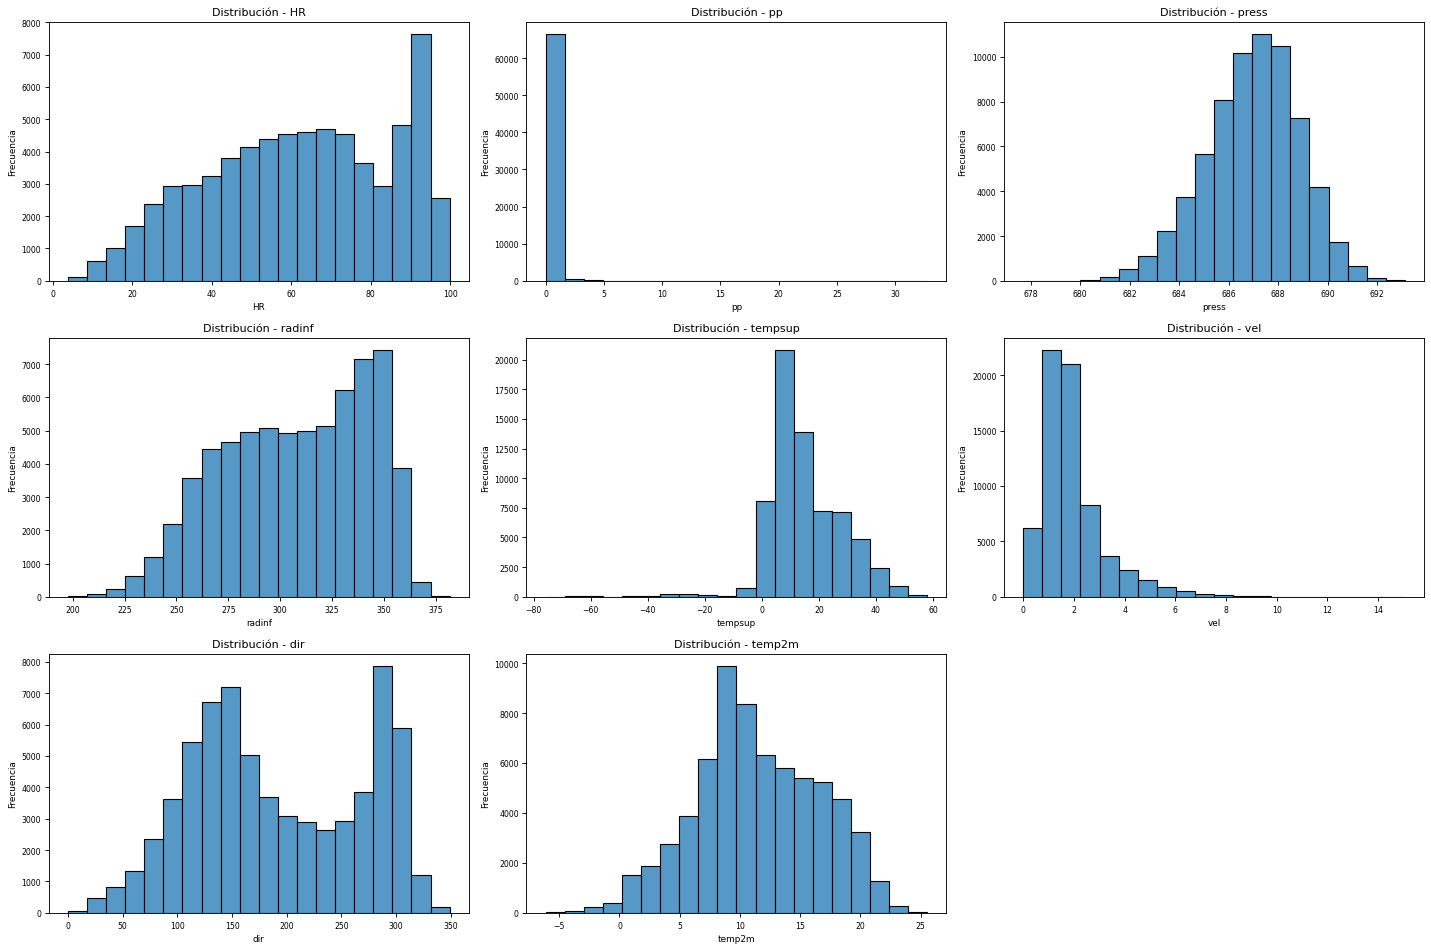

In [11]:
# 2. Análisis de Distribuciones Nuevo Dataset (OPTIMIZADO)
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset (sin parsear fechas ya que no se necesitan para histogramas)
df_clean_v2 = pd.read_csv("../data/processed/df_clean_v2.csv")

# Excluir columnas no necesarias
columnas_a_graficar = [col for col in df_clean_v2.columns if col not in ['time', 'dir_sin', 'dir_cos', 'Unnamed: 0']]

# Calcular filas y columnas necesarias
n_cols = len(columnas_a_graficar)
n_rows = math.ceil(n_cols / 3)

# Crear figura con subplots (DPI reducido para acelerar renderizado)
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4), dpi=80)
axes = axes.flatten()

# Generar histogramas optimizados
for idx, column in enumerate(columnas_a_graficar):
    # Usar menos bins y deshabilitar KDE para acelerar
    sns.histplot(df_clean_v2[column], bins=20, kde=False, ax=axes[idx], stat='count')
    axes[idx].set_title(f'Distribución - {column}', fontsize=10)
    axes[idx].set_xlabel(column, fontsize=8)
    axes[idx].set_ylabel('Frecuencia', fontsize=8)
    axes[idx].tick_params(labelsize=7)

# Ocultar ejes sobrantes
for idx in range(n_cols, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

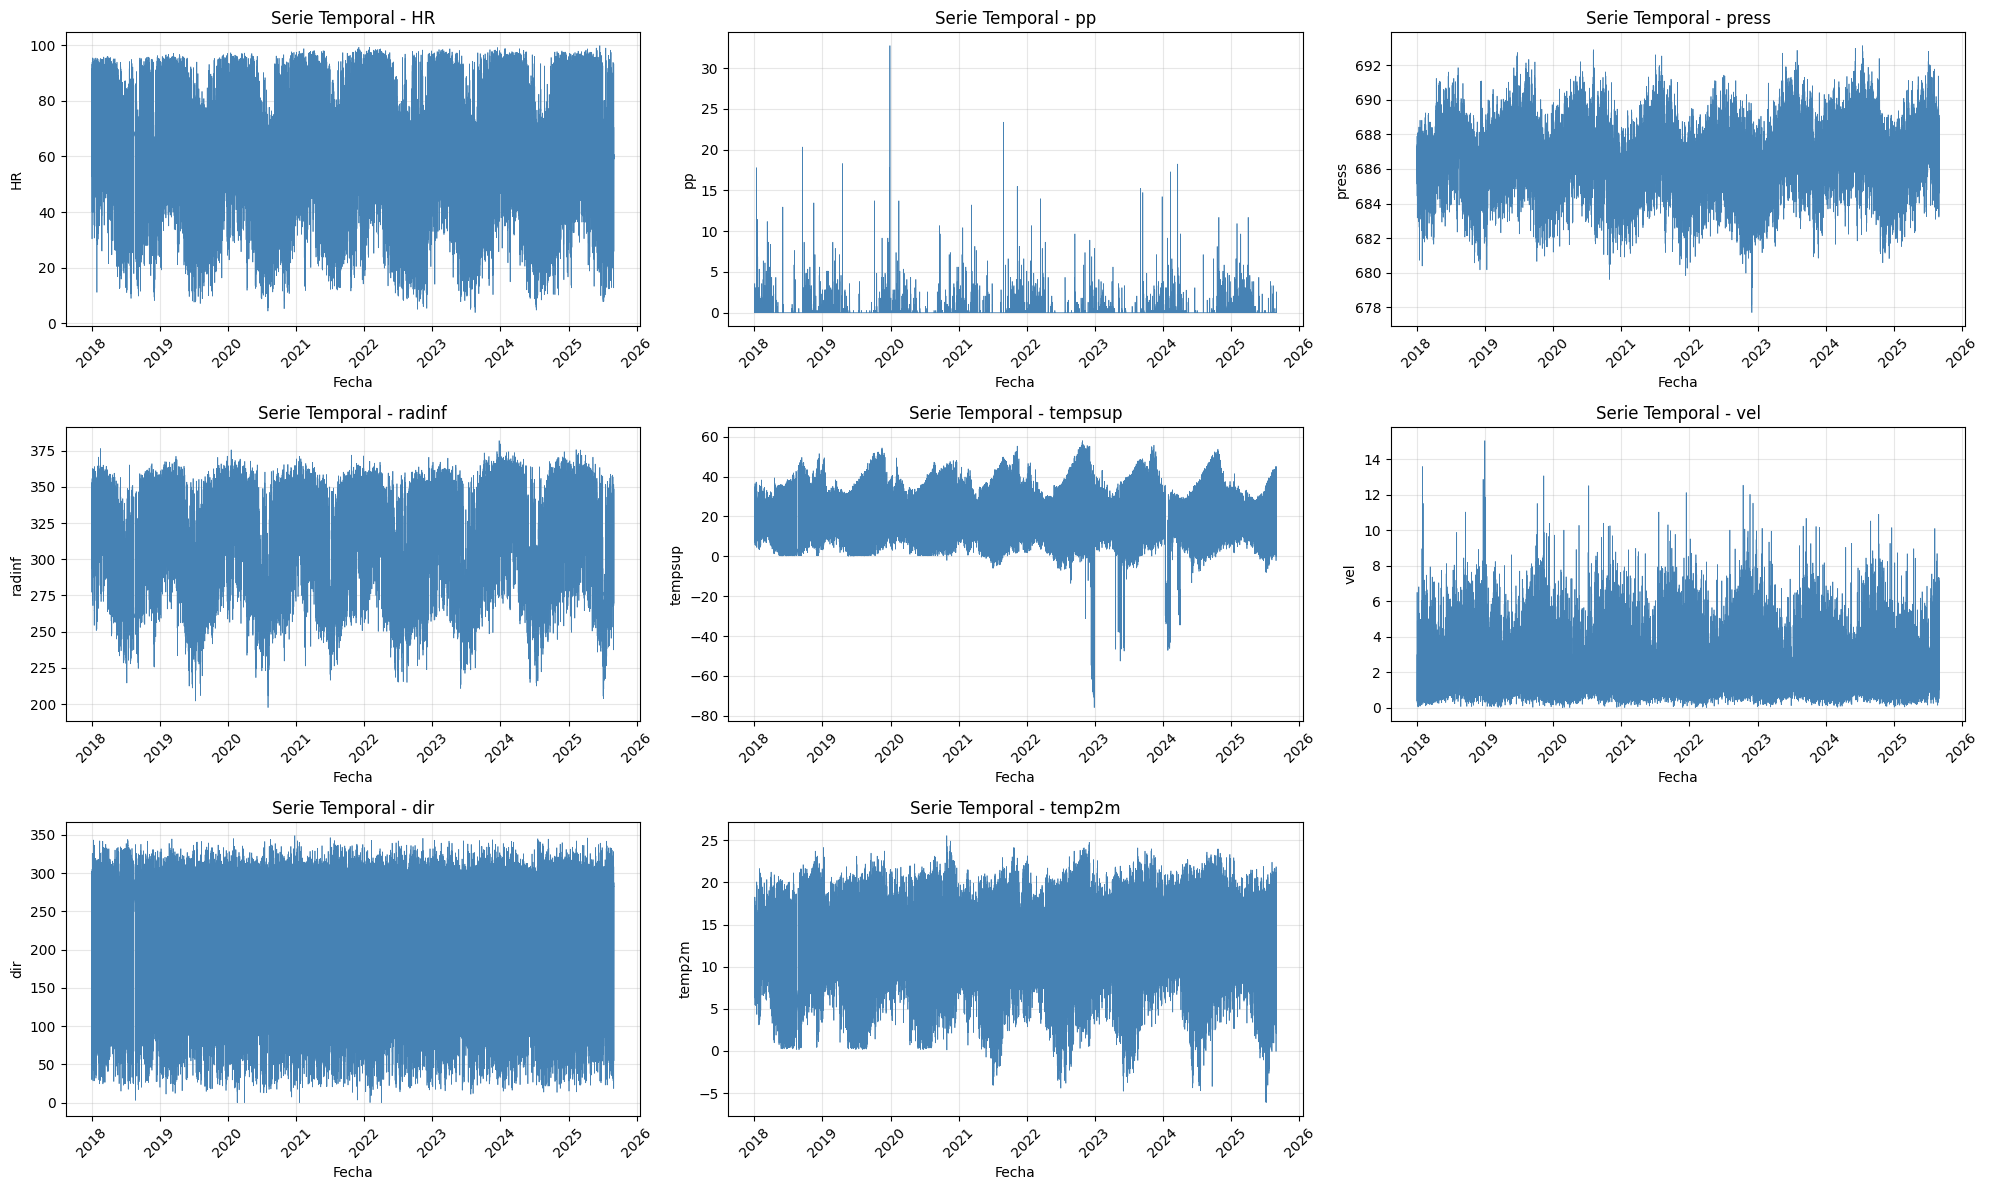

In [12]:
# 3. Análisis de Series Temporales Nuevo Dataset
# Cargar y preparar el dataset con índice de fecha parseado
df_clean_v2 = pd.read_csv("../data/processed/df_clean_v2.csv", index_col=0, parse_dates=True)

# Filtrar columnas: excluir dir_sin y dir_cos
columnas_a_graficar = [col for col in df_clean_v2.columns if col not in ['dir_sin', 'dir_cos']]

# Calcular filas y columnas necesarias
n_cols = len(columnas_a_graficar)
n_rows = math.ceil(n_cols / 3)  # 3 gráficos por fila

# Crear figura con subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Generar gráficos de series temporales
for idx, column in enumerate(columnas_a_graficar):
    axes[idx].plot(df_clean_v2.index, df_clean_v2[column], linewidth=0.5, color='steelblue')
    axes[idx].set_title(f'Serie Temporal - {column}')
    axes[idx].set_xlabel('Fecha')
    axes[idx].set_ylabel(column)
    axes[idx].grid(True, alpha=0.3)
    
    # Rotar etiquetas del eje x para mejor legibilidad
    axes[idx].tick_params(axis='x', rotation=45)

# Ocultar ejes sobrantes si el número de columnas no es múltiplo de 3
for idx in range(n_cols, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

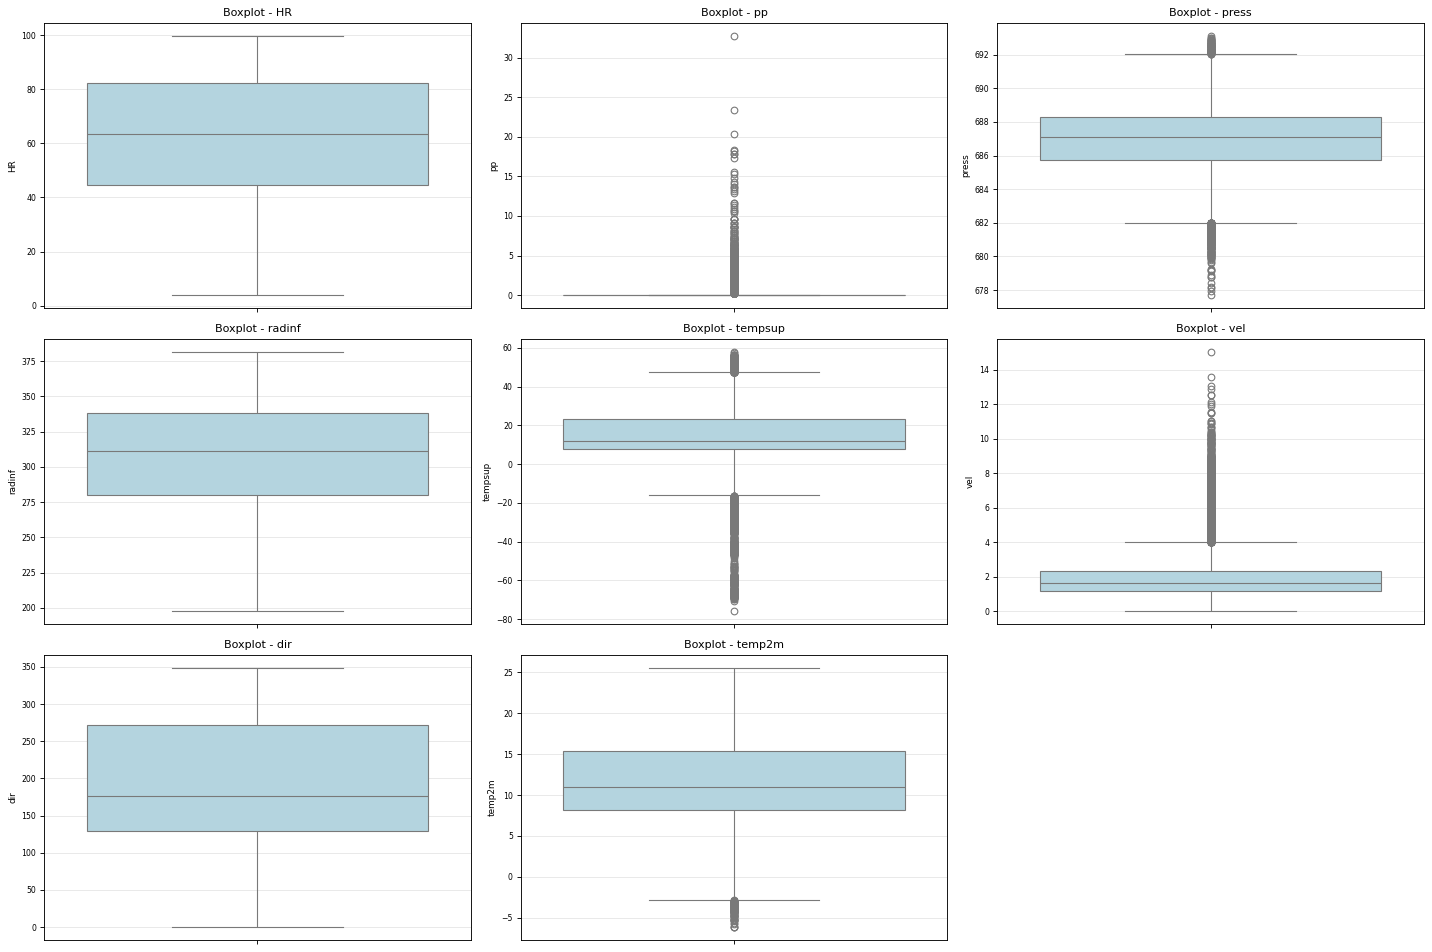

In [13]:
# 4. Análisis de Outliers con boxplots
# Cargar dataset con índice parseado (más eficiente)
df_clean_v2 = pd.read_csv("../data/processed/df_clean_v2.csv", index_col=0, parse_dates=True)

# Filtrar columnas: excluir dir_sin, dir_cos y columnas no numéricas
columnas_analisis = [col for col in df_clean_v2.columns 
                     if col not in ['dir_sin', 'dir_cos'] 
                     and df_clean_v2[col].dtype in ['float64', 'int64']]

# Calcular filas y columnas necesarias
n_cols = len(columnas_analisis)
n_rows = math.ceil(n_cols / 3)

# Crear figuras con subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4), dpi=80)
axes = axes.flatten()

# Graficar boxplots
for idx, column in enumerate(columnas_analisis):
    sns.boxplot(y=df_clean_v2[column], ax=axes[idx], color='lightblue')
    axes[idx].set_title(f'Boxplot - {column}', fontsize=10)
    axes[idx].set_ylabel(column, fontsize=8)
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].tick_params(labelsize=7)

# Ocultar ejes sobrantes
for idx in range(n_cols, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

## 4. Análisis de Correlación

### 4.1 Periodo de 24 horas

In [23]:
# 1. Definimos el nuevo Target
target_col = 'temp2m'

# 2. Cálculo de Correlación
# Quitamos 'tempsup' porque se usará temp2m como target
cols_to_use = [c for c in df_clean_v2.columns if c != 'tempsup' and c != 'dir'] # 'dir' cruda se va, quedan seno/coseno
corr_matrix = df_clean_v2[cols_to_use].corr()

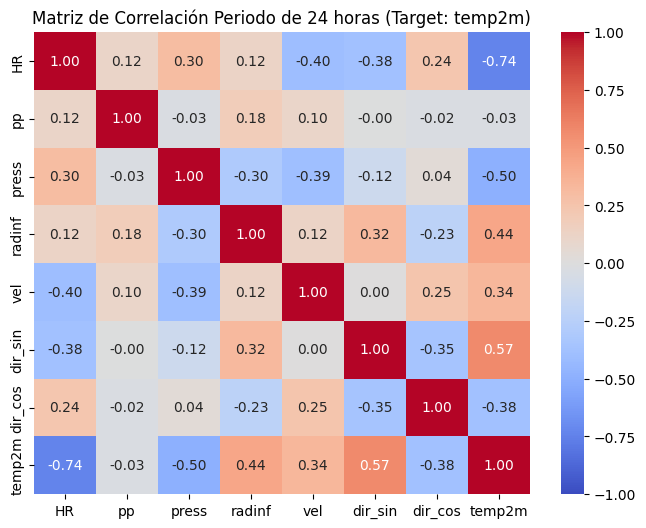

In [24]:
# 3. Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title(f"Matriz de Correlación Periodo de 24 horas (Target: {target_col})")
plt.show()

In [25]:
# 4. Ranking de Importancia Periodo 24 horas
print(f"--- Ranking de influencia sobre {target_col} (24 horas) ---")
print(corr_matrix[target_col].sort_values(ascending=False))

--- Ranking de influencia sobre temp2m (24 horas) ---
temp2m     1.000000
dir_sin    0.574361
radinf     0.436366
vel        0.338288
pp        -0.027205
dir_cos   -0.381111
press     -0.499987
HR        -0.736744
Name: temp2m, dtype: float64


### 4.2 Periodo Nocturno

In [18]:
# 1. Filtrado Nocturno
df_night = df_clean_v2.between_time('18:00', '07:00').drop(columns=['tempsup', 'dir'])

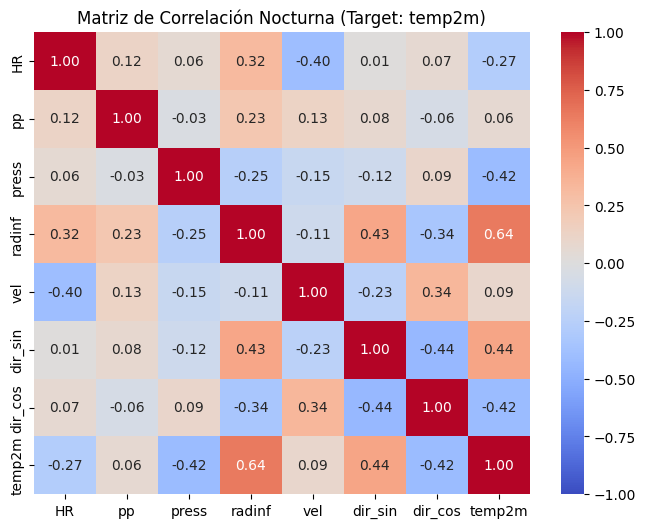

In [21]:
# 2. Cálculo de Correlación Periodo Nocturno
# Quitamos 'tempsup' porque ya no la usarás
corr_matrix_night = df_night.corr()

# 3. Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_night, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title(f"Matriz de Correlación Nocturna (Target: {target_col})")
plt.show()

In [26]:
# 5. Ranking de Importancia
print(f"--- Ranking de influencia sobre {target_col} (Noche) ---")
print(corr_matrix_night[target_col].sort_values(ascending=False))

--- Ranking de influencia sobre temp2m (Noche) ---
temp2m     1.000000
radinf     0.644388
dir_sin    0.439794
vel        0.090788
pp         0.062557
HR        -0.274458
press     -0.417132
dir_cos   -0.421521
Name: temp2m, dtype: float64


## 5. Ingeniería de Características

La variable **temp2m_lag1** representa la temperatura a 2 metros de altura (**temp2m**) con un desfase temporal de 1 hora:

$$temp2m\_lag1_t = temp2m_{t-1}$$

Donde:
- $temp2m\_lag1_t$ = Temperatura a 2m en el tiempo actual (t)
- $temp2m_{t-1}$ = Temperatura a 2m en el tiempo anterior (t-1 hora)

Esta variable captura la **inercia térmica**, permitiendo al modelo utilizar la información de la temperatura previa para predecir la temperatura actual.

In [27]:
# 1. Creación del Lag (Shift) de 1 hora
# Creamos una columna nueva que es la versión "retrasada 1 paso" de temp2m
df_clean_v2['temp2m_lag1'] = df_clean_v2['temp2m'].shift(1)

# 2. Limpieza
# La primera fila del dataset quedará vacía (NaN) porque no tiene "ayer". La borramos.
df_clean_v2.dropna(inplace=True)

# 3. Filtrado de la Zona de Helada (18:00 - 07:00)
df_model = df_clean_v2.between_time('18:00', '07:00').copy()

In [28]:
# 4. Validación: ¿Qué tan fuerte es la inercia?
# Calculamos la correlación entre la temperatura actual y la de hace 1 hora
correlacion_lag = df_model['temp2m'].corr(df_model['temp2m_lag1'])

print(f"--- Validación de Inercia Térmica ---")
print(f"Correlación temp2m(t) vs temp2m(t-1): {correlacion_lag:.4f}")

--- Validación de Inercia Térmica ---
Correlación temp2m(t) vs temp2m(t-1): 0.9332


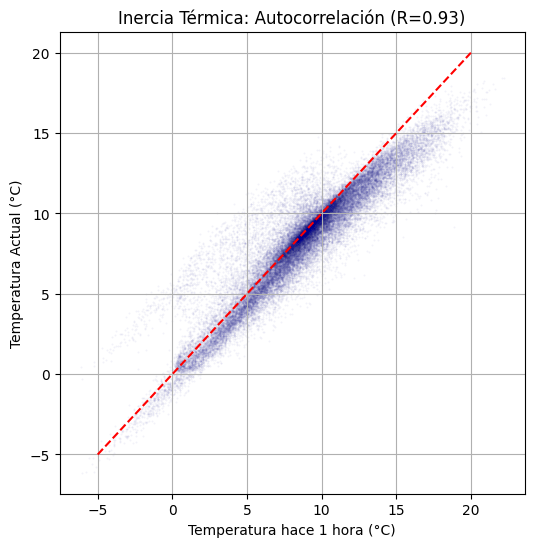


Variables listas para el modelo:
['HR', 'pp', 'press', 'radinf', 'tempsup', 'vel', 'dir', 'dir_sin', 'dir_cos', 'temp2m', 'temp2m_lag1']


In [29]:
# 5. Visualización (Gráfico de Autocorrelación) entre temp2m y temp2m_lag1
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df_model['temp2m_lag1'], y=df_model['temp2m'], alpha=0.05, s=2, color='darkblue')
plt.title(f"Inercia Térmica: Autocorrelación (R={correlacion_lag:.2f})")
plt.xlabel("Temperatura hace 1 hora (°C)")
plt.ylabel("Temperatura Actual (°C)")
plt.plot([-5, 20], [-5, 20], 'r--') # Línea de identidad (si no cambiara nada)
plt.grid(True)
plt.show()

# Verificamos las nuevas columnas disponibles
print("\nVariables listas para el modelo:")
print(df_model.columns.tolist())

In [30]:
# Exportación del DataFrame con lag preparado para modelado
df_model_v2 = df_model.to_csv("../data/processed/df_model_v2.csv", index=True)